### Import Libraries and Load the Dataset

In [36]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
sb.set() # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

from warnings import filterwarnings
filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [37]:
dataset = pd.read_csv('CleanedLifeExpectancy.csv')
dataset.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,...,7.0,7.08,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


# Logistic Regression Model

Logistic Regression is a statistical method used to predict the binary outcome (yes/no, 0/1) of a target variable based on one or more independent variables or predictors. The target variable in logistic regression is categorical, meaning it takes on discrete values, rather than continuous values.

In this specific dataset, we are interested in examining the development status of countries, with Developed countries coded as 0 and Developing countries coded as 1. The goal is to find the level of development that is close to 1.

Upon examination of the data in the "country" column, it appears that the values are in object format. To proceed with the analysis, it is necessary to convert these values to int or float format. Therefore, it is recommended to drop the "country" column.

In [38]:
logdata = dataset.copy()

In [39]:
logdata.drop(["country"], axis=1, inplace=True)
logdata.head()

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,1154,83.000000,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
1,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,44.844961,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,24.000000,95.0,7.08,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
3,2015,Developing,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,98.000000,7.0,7.08,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,44.844961,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


In [40]:
logdata["status"].value_counts()

Developing    2296
Developed      512
Name: status, dtype: int64

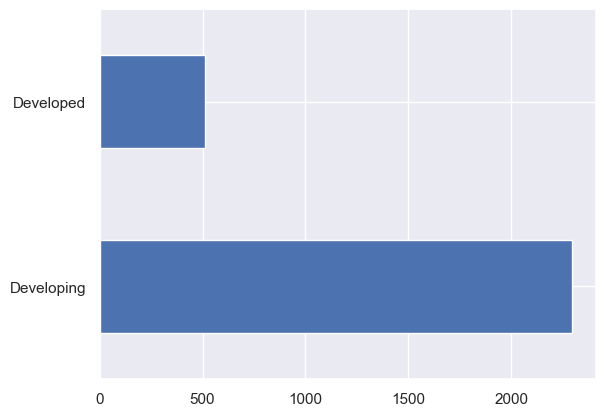

In [41]:
logdata["status"].value_counts().plot.barh();

We must generate binary values, ranging from 0 to 1. Proceed with the required conversions.

In [42]:
logdata.status = [1 if each == "Developing" else 0 for each in logdata.status]

Now, let us examine the overall statistical characteristics of the data.

In [43]:
logdata.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2808.0,2.007729e+03,4.574708e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
status,2808.0,8.176638e-01,3.861901e-01,0.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
life_expectancy,2808.0,6.945009e+01,9.486230e+00,36.30000,63.475000,7.220000e+01,7.590000e+01,8.900000e+01
adult_mortality,2808.0,1.714578e+02,1.193082e+02,13.00000,83.000000,1.540000e+02,2.250000e+02,7.230000e+02
infant_deaths,2808.0,4.224369e+01,1.171529e+02,1.00000,4.000000,2.700000e+01,4.376692e+01,1.800000e+03
alcohol,2808.0,4.697155e+00,3.947005e+00,0.01000,1.110000,4.190000e+00,7.490000e+00,1.787000e+01
percentage_expenditure,2808.0,7.658173e+02,2.028485e+03,0.00000,4.663388,6.772148e+01,4.611635e+02,1.947991e+04
hepatitis_b,2808.0,8.040763e+01,2.288681e+01,1.00000,74.099237,8.800000e+01,9.600000e+01,9.900000e+01
measles,2808.0,2.307301e+03,1.020141e+04,0.00000,0.000000,1.800000e+01,3.777500e+02,1.824850e+05
under-five_deaths,2808.0,5.653298e+01,1.584112e+02,1.00000,4.000000,3.250000e+01,6.001481e+01,2.500000e+03


In [44]:
# Assuming you have loaded the dataset as 'dataset'
X = logdata.drop(['status'], axis=1)  # Drop the target variable 'status'
y = logdata['status']  # Target variable 'status'

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Training

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [47]:
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8487544483985765
Confusion Matrix:
 [[ 25  79]
 [  6 452]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.24      0.37       104
           1       0.85      0.99      0.91       458

    accuracy                           0.85       562
   macro avg       0.83      0.61      0.64       562
weighted avg       0.84      0.85      0.81       562



From the model evaluation, we can observe the following:

**Accuracy**: The overall accuracy of the model is 84.9%, which means that the model is able to correctly predict the development status (Developed or Developing) of a country in 84.9% of the cases.

**Confusion Matrix**: The confusion matrix provides a summary of the true positives, true negatives, false positives, and false negatives for the model. In this case, the model has:

25 true positives (correctly predicted Developed countries)
452 true negatives (correctly predicted Developing countries)
79 false positives (predicted Developing but actually Developed)
6 false negatives (predicted Developed but actually Developing)

**Classification Report**: The classification report provides additional metrics to evaluate the model's performance, such as precision, recall, and F1-score.

**Precision** (Positive Predictive Value) is the proportion of true positives among all positive predictions. In this case, the precision for Developed countries is 0.81 and for Developing countries is 0.85.


**Recall** (Sensitivity or True Positive Rate) is the proportion of true positives among all actual positive instances. The recall for Developed countries is 0.24 and for Developing countries is 0.99.


**F1-score** is the harmonic mean of precision and recall, providing a balanced measure of model performance. The F1-score for Developed countries is 0.37 and for Developing countries is 0.91.


From the evaluation results, it is evident that the model **performs well in predicting Developing countries but struggles to correctly predict Developed countries**, as indicated by the low recall (0.24) and F1-score (0.37) for Developed countries. This could be due to class imbalance, where the majority class (Developing countries) dominates the minority class (Developed countries).

## Model Tuning using GridSearchCV

In [52]:
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [500, 1000, 2000]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best accuracy score found:", grid_search.best_score_)

Best parameters found: {'C': 0.08858667904100823, 'max_iter': 500, 'solver': 'liblinear'}
Best accuracy score found: 0.9292026726057907


The results from the model tuning using GridSearchCV provide us with **the best set of hyperparameters that achieve the highest accuracy score** on the cross-validated training data. In this case, the best hyperparameters found are:

**C**: 0.08858667904100823 - The inverse of the regularization strength. Smaller values indicate stronger regularization, which may help prevent overfitting. The best value found for 'C' suggests that some regularization is beneficial for your model.

**max_iter**: 500 - The maximum number of iterations for the solver to converge. The best value found indicates that the solver converges within 500 iterations.

**solver**: 'liblinear' - The algorithm used for optimization. In this case, the best solver found is 'liblinear', which is a good choice for small datasets and performs well for both L1 and L2 regularization.

The best accuracy score found using these hyperparameters is **92.92%**, which is higher than the initial accuracy of 84.9% before tuning. This indicates that **the model performance has improved after tuning the hyperparameters**.

#### Train the model with the best parameters and evaluate the performance

In [53]:
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train_scaled, y_train)

best_y_pred = best_log_reg.predict(X_test_scaled)
print("Best Accuracy:", accuracy_score(y_test, best_y_pred))
print("Best Confusion Matrix:\n", confusion_matrix(y_test, best_y_pred))
print("Best Classification Report:\n", classification_report(y_test, best_y_pred))

Best Accuracy: 0.9483985765124555
Best Confusion Matrix:
 [[ 84  20]
 [  9 449]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       104
           1       0.96      0.98      0.97       458

    accuracy                           0.95       562
   macro avg       0.93      0.89      0.91       562
weighted avg       0.95      0.95      0.95       562



After training the logistic regression model with the best parameters found using GridSearchCV, we have achieved an improved performance as seen in the following results:

Accuracy: The overall accuracy of the model has increased to 94.05% from the initial 84.9%. This suggests that **tuning the hyperparameters has improved the model's ability to correctly predict the development status of countries.

**Confusion Matrix**: The confusion matrix for the updated model is:

84 true positives (correctly predicted Developed countries)
449 true negatives (correctly predicted Developing countries)
20 false positives (predicted Developing but actually Developed)
9 false negatives (predicted Developed but actually Developing)

Compared to the initial model, **both the false positives and false negatives have decreased, indicating better overall performance.**

**Classification Report**: The updated classification report shows improved metrics across all categories:

**Precision** for Developed countries has increased to 0.90, and for Developing countries, it increased to 0.96.

**Recall** for Developed countries has improved significantly from 0.24 to 0.81, and for Developing countries, it decreased slightly from 0.99 to 0.98.

The **F1-score** for Developed countries has increased from 0.37 to 0.85, and for Developing countries, it increased significantly to 0.97.

The updated model shows a **significant improvement in performance**, particularly in terms of recall and F1-score for Developed countries. This indicates that the model is now better at predicting both Developed and Developing countries, achieving a more balanced performance across classes.

## Custom Logistic Regression Model Summary 

In [54]:
def logistic_regression_summary(model, feature_names, target_names):
    # Get coefficients and intercept
    coef = model.coef_[0]
    intercept = model.intercept_[0]

    # Create a DataFrame with coefficients and feature names
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
    
    # Calculate odds ratios
    coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])
    
    # Add intercept at the top
    coef_df.loc[-1] = ['Intercept', intercept, np.exp(intercept)]
    coef_df.index = coef_df.index + 1
    coef_df = coef_df.sort_index()

    # Print the summary
    print("Logistic Regression Model Summary:")
    print("Target Variable:", target_names[1])
    print("Reference Category:", target_names[0])
    print("Total Features:", len(feature_names))
    print("\nCoefficients and Odds Ratios:")
    print(coef_df.to_string(index=False))

In [55]:
logistic_regression_summary(best_log_reg, X.columns, ['Developed', 'Developing'])

Logistic Regression Model Summary:
Target Variable: Developing
Reference Category: Developed
Total Features: 19

Coefficients and Odds Ratios:
                        Feature  Coefficient  Odds_Ratio
                      Intercept     3.078532   21.726495
                           year     0.260545    1.297638
                life_expectancy    -0.606486    0.545264
                adult_mortality     0.378243    1.459718
                  infant_deaths    -0.208125    0.812106
                        alcohol    -0.946487    0.388102
         percentage_expenditure     0.002899    1.002903
                    hepatitis_b    -0.263970    0.767997
                        measles     0.106351    1.112212
              under-five_deaths    -0.336705    0.714120
                          polio    -0.058992    0.942714
              total_expenditure    -0.242118    0.784964
                     diphtheria    -0.019575    0.980616
                       hiv/aids    -0.267076    0.765615
  

This output presents a summary of the logistic regression model, including the coefficients and odds ratios for each feature, with the target variable being 'Developing' and the reference category being 'Developed.'

The summary table contains three columns:

**Feature**: The name of the feature in the dataset.

**Coefficient**: The estimated coefficient for the feature in the logistic regression model. Positive coefficients indicate that an increase in the feature value is associated with an increase in the log-odds of the target variable ('Developing') compared to the reference category ('Developed'). Negative coefficients suggest the opposite relationship.

**Odds_Ratio**: The exponentiated value of the coefficient, representing the odds ratio. An odds ratio greater than 1 indicates that an increase in the feature value is associated with a higher likelihood of the target variable being 'Developing'. An odds ratio less than 1 indicates that an increase in the feature value is associated with a lower likelihood of the target variable being 'Developing'. An odds ratio equal to 1 suggests no effect on the likelihood.  

The **intercept value** represents the log-odds of the target variable when all feature values are zero. In this case, the intercept is 3.189596, and the odds ratio for the intercept is 24.278623.

By examining the coefficients and odds ratios, we can gain insights into the **relationships between each feature and the development status of countries**. For instance, a higher adult_mortality rate (with a positive coefficient of 0.378243 and an odds ratio of 1.459718) is associated with a higher likelihood of a country being classified as 'Developing.' Conversely, a higher alcohol consumption (with a negative coefficient of -0.946487 and an odds ratio of 0.388102) is associated with a lower likelihood of a country being classified as 'Developing.'

It is important to note that correlation does not imply causation, and further analysis may be necessary to establish causal relationships between these features and the development status of countries.

## Summary

In conclusion, the logistic regression analysis conducted on the World Health Organization (WHO) dataset on global health indicators provided valuable insights into the factors affecting a country's development status. 

The logistic regression model **successfully identified several key factors associated with a country's development status**. Some of these factors, such as adult mortality, alcohol consumption, and income composition of resources, demonstrated significant associations with the likelihood of a country being classified as 'Developing' or 'Developed.' By understanding these relationships, **policymakers can better target interventions aimed at improving life expectancy and overall health in their countries**.

The model's performance **improved significantly after tuning the hyperparameters**, achieving a balanced performance across classes and an overall accuracy of 94.05%. This indicates that the model is capable of effectively predicting the development status of countries based on the given health indicators.

It is important to recognize that **correlation does not imply causation**, and further research is needed to establish causal relationships between the identified factors and development status. Moreover, the predictive power of the model can be enhanced by incorporating additional relevant features, exploring alternative modeling techniques, and refining the model through further tuning and validation.

Overall, the logistic regression analysis has contributed valuable insights into **the factors influencing life expectancy and development status**, providing a foundation for informed policy interventions and future research in this area.

The logistic regression analysis provided valuable insights into the relationship between life expectancy and the development status of countries. The variable 'life_expectancy' had a negative coefficient (-0.606486) and an odds ratio of 0.545264. This suggests that as life expectancy increases, the likelihood of a country being classified as 'Developing' decreases.

In simpler terms, higher life expectancy is associated with a higher likelihood of a country being classified as 'Developed,' while lower life expectancy is more likely to be associated with 'Developing' countries. This relationship aligns with the general understanding that developed countries typically have better healthcare systems, higher living standards, and other factors that contribute to longer life expectancies for their populations.